In [13]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy import ndimage

In [14]:
folder_path='/content/drive/MyDrive/keypoints_from_videos_json/squat/'

In [15]:
def angle_between_points(a, b, c):

    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

In [27]:
#check for width and height should be multiple of 16

count_of_squats = 0
squat_pos = 0
prev_squat_pos = 0
angles_list=[]
# i = 0
for json_file in os.listdir(folder_path):
  # print(json_file)
  f=open(folder_path+json_file,)
  raw_json=json.load(f)
  x=list(raw_json.items())[1][1][0]['pose_keypoints_2d']
  x=np.array(x).reshape(18,3)
  # print(x)
  f.close()
  try:
    # calculate left leg angle
    # center_11=int(x[11][0]*1920),int(x[11][1]*1080)#left hip value
    # center_12=int(x[12][0]*1920),int(x[12][1]*1080)#left knee value
    # center_13=int(x[13][0]*1920),int(x[13][1]*1080)#left ankle value
    center_11=int(x[11][0]),int(x[11][1])#left hip value
    center_12=int(x[12][0]),int(x[12][1])#left knee value
    center_13=int(x[13][0]),int(x[13][1])#left ankle value

    #check for squat
    squat_left_angle = int(angle_between_points(center_11, center_12, center_13))
    
    squat_pos = 1 if squat_left_angle <= 85 else 0
    if prev_squat_pos - squat_pos == 1:
      count_of_squats +=1

    prev_squat_pos = squat_pos

    print(squat_left_angle, squat_pos, count_of_squats)

    angles_list.append(squat_left_angle)
  except:
    pass

  

167 0 0
167 0 0
167 0 0
167 0 0
167 0 0
169 0 0
167 0 0
167 0 0
166 0 0
167 0 0
168 0 0
165 0 0
167 0 0
165 0 0
166 0 0
168 0 0
166 0 0
168 0 0
168 0 0
168 0 0
168 0 0
168 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
172 0 0
172 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
170 0 0
173 0 0
173 0 0
174 0 0
175 0 0
174 0 0
176 0 0
178 0 0
179 0 0
180 0 0
177 0 0
171 0 0
169 0 0
161 0 0
161 0 0
157 0 0
156 0 0
151 0 0
151 0 0
148 0 0
144 0 0
141 0 0
138 0 0
133 0 0
131 0 0
129 0 0
125 0 0
122 0 0
122 0 0
119 0 0
115 0 0
113 0 0
111 0 0
109 0 0
104 0 0
103 0 0
100 0 0
99 0 0
96 0 0
92 0 0
89 0 0
91 0 0
89 0 0
86 0 0
88 0 0
86 0 0
87 0 0
85 1 0
86 0 1
88 0 1
91 0 1
92 0 1
93 0 1
93 0 1
95 0 1
100 0 1
103 0 1
105 0 1
110 0 1
112 0 1
114 0 1
119 0 1
122 0 1
125 0 1
130 0 1
133 0 1
138 0 1
142 0 1
148 0 1
152 0 1
153 0 1
157 0 1
160 0 1
167 0 1
171 0 1
174 0 1
175 0 1
177 0 1
179 0 1
177 0 1
174 0 1
172 0 1
17

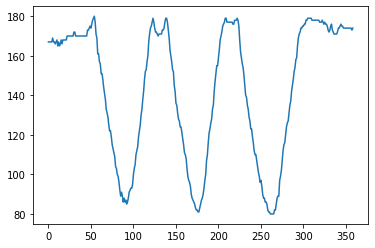

In [28]:
plt.plot(angles_list)

In [29]:
len(avg_angles)

15

In [30]:
min(angles_list)

80

In [31]:
max(angles_list)

180

In [33]:
x=np.array(angles_list)-85

In [34]:
x=x/85

In [35]:
x=np.abs(x-1)*100

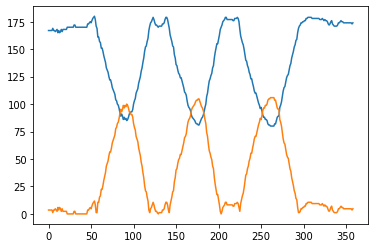

In [36]:
plt.plot(angles_list)
plt.plot(x)
plt.show()

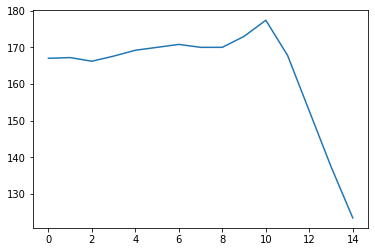

In [17]:
avg_angles=[]
for i in range(0,len(angles_list)//5,5):
  avg_angles.append(np.mean(angles_list[i:i+5]))
plt.plot(avg_angles)

In [26]:
len(angles_list)

359

COUNTING REPS BASED ON THRESHOLD

In [ ]:
counter=0
prev_check=0

for i in x:
  pos = 1 if i >= 50 else 0
  if prev_check - pos == 1:
    counter +=1
  prev_check = pos
    


In [ ]:
counter